# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [95]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [96]:
# 检查数据维度
data.shape

(112915, 11)

In [97]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [126]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

In [127]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [156]:
# 提示：查看train_test_split函数

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

# 查看数据的维度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((76053, 10), (32595, 10), (76053,), (32595,))

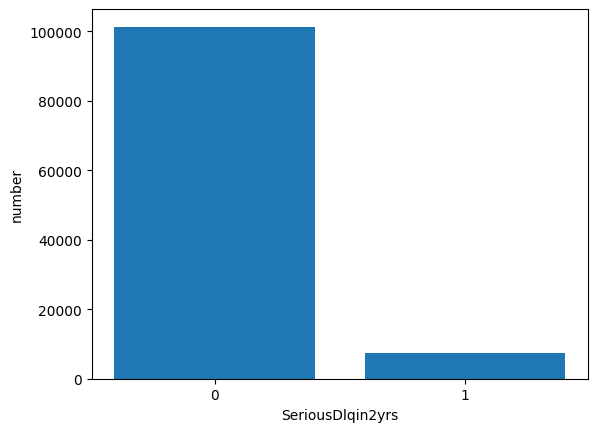

<Axes: xlabel='SeriousDlqin2yrs'>

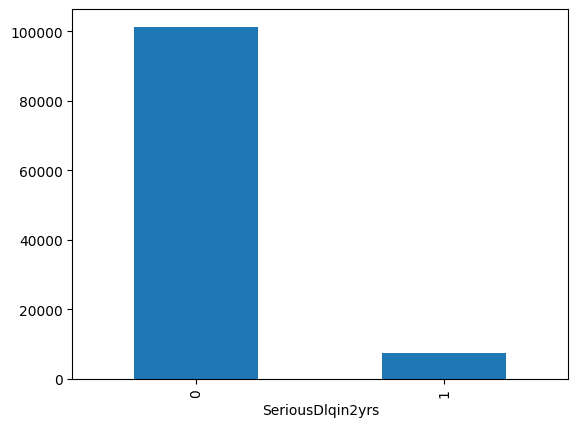

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
SeriousDlqin2yrs_data=data['SeriousDlqin2yrs'].value_counts()
SeriousDlqin2yrs_data
# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')
plt.bar(SeriousDlqin2yrs_data.index, SeriousDlqin2yrs_data.values)
plt.xticks(SeriousDlqin2yrs_data.index)
plt.xlabel('SeriousDlqin2yrs')
plt.ylabel('number')
plt.show()
#直接绘图
SeriousDlqin2yrs_data.plot(kind='bar')


#### 2.数据预处理之离散化

In [159]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)
# import numpy as np
# def cut_age(data):
#     # 获取最小和最大年龄值
#     min_age = data['age'].min()
#     max_age = data['age'].max()

#     # 计算分桶边界
#     bins = np.arange(min_age, max_age + 4, 3)   # 每3岁一个区间
#     data['age_bucket'] = pd.cut(data['age'], bins, labels=False)
#     return data
# X_test=cut_age(X_test)
# X_train=cut_age(X_train)
import numpy as np
def cut_age(data, min_age, max_age):
    # 计算分桶边界
    bins = np.arange(min_age, max_age + 4, 3)   # 每3岁一个区间
    data['age_bucket'] = pd.cut(data['age'], bins, labels=False)
    return data

# 获取所有数据的最小和最大年龄值
min_age = min(X_train['age'].min(), X_test['age'].min())
max_age = max(X_train['age'].max(), X_test['age'].max())

X_test1=cut_age(X_test, min_age, max_age)
X_train1=cut_age(X_train, min_age, max_age)
X_train1



,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_bucket
64329,0.116959,27.0,0.0,0.326024,3100.0,7.0,0.0,0.0,0.0,1.0,8.0
70087,0.050666,83.0,0.0,0.177182,10000.0,9.0,0.0,1.0,0.0,0.0,27.0
77642,0.038865,72.0,0.0,0.016600,5722.0,7.0,0.0,0.0,0.0,0.0,23.0
6017,0.023513,56.0,0.0,0.266260,10500.0,8.0,0.0,2.0,0.0,3.0,18.0
106521,0.039350,83.0,0.0,0.195179,1700.0,3.0,0.0,0.0,0.0,0.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...
22092,0.576336,48.0,1.0,0.303042,10750.0,17.0,0.0,1.0,0.0,3.0,15.0
47726,1.000000,28.0,0.0,0.068123,2700.0,2.0,0.0,0.0,0.0,0.0,9.0
44326,0.275989,67.0,0.0,0.267683,4000.0,4.0,0.0,1.0,0.0,0.0,22.0
45320,0.979204,29.0,1.0,0.098725,4000.0,5.0,0.0,0.0,0.0,3.0,9.0


#### 3.数据预处理之独热向量编码

In [169]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成
import pandas as pd
def get_dummies_age(data):
    # 对年龄段进行独热向量编码
    age_bucket_encoded = pd.get_dummies(data['age_bucket'], prefix='age_bucket')

    # 将独热向量编码的结果与原数据集合并
    df_encoded = pd.concat([data, age_bucket_encoded], axis=1)
    return df_encoded

X_test2=get_dummies_age(X_test1)
X_train2=get_dummies_age(X_train1)

age_bucket_34 = pd.Series(False, index=X_test2.index, name="age_bucket_34")

# 将新的Series添加为X_test2的列
X_test2['age_bucket_34'] = age_bucket_34
# 打印结果
X_test2
X_train2


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_bucket,age_bucket_6.0,age_bucket_7.0,age_bucket_8.0,age_bucket_9.0,age_bucket_10.0,age_bucket_11.0,age_bucket_12.0,age_bucket_13.0,age_bucket_14.0,age_bucket_15.0,age_bucket_16.0,age_bucket_17.0,age_bucket_18.0,age_bucket_19.0,age_bucket_20.0,age_bucket_21.0,age_bucket_22.0,age_bucket_23.0,age_bucket_24.0,age_bucket_25.0,age_bucket_26.0,age_bucket_27.0,age_bucket_28.0,age_bucket_29.0,age_bucket_30.0,age_bucket_31.0,age_bucket_32.0,age_bucket_33.0,age_bucket_34.0
64329,0.116959,27.0,0.0,0.326024,3100.0,7.0,0.0,0.0,0.0,1.0,8.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70087,0.050666,83.0,0.0,0.177182,10000.0,9.0,0.0,1.0,0.0,0.0,27.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
77642,0.038865,72.0,0.0,0.016600,5722.0,7.0,0.0,0.0,0.0,0.0,23.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
6017,0.023513,56.0,0.0,0.266260,10500.0,8.0,0.0,2.0,0.0,3.0,18.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
106521,0.039350,83.0,0.0,0.195179,1700.0,3.0,0.0,0.0,0.0,0.0,27.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22092,0.576336,48.0,1.0,0.303042,10750.0,17.0,0.0,1.0,0.0,3.0,15.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
47726,1.000000,28.0,0.0,0.068123,2700.0,2.0,0.0,0.0,0.0,0.0,9.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44326,0.275989,67.0,0.0,0.267683,4000.0,4.0,0.0,1.0,0.0,0.0,22.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
45320,0.979204,29.0,1.0,0.098725,4000.0,5.0,0.0,0.0,0.0,3.0,9.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### 4.数据预处理之幅度缩放

In [182]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler
def StandardScaler_for_ctn(df_encoded):
    sc = StandardScaler()  # 对数据的每一列做了一个归一化

    # 将连续值特征选择出来
    continuous_features1 = df_encoded[['DebtRatio']]
    continuous_features2=df_encoded[['RevolvingUtilizationOfUnsecuredLines']]

    # 创建2个StandardScaler对象
    sc1 = StandardScaler()
    sc2=StandardScaler()
    # 对连续值特征进行幅度缩放
    scaled_features1 = sc1.fit_transform(continuous_features1)
    scaled_features2 = sc2.fit_transform(continuous_features2)
    # 将缩放后的连续值特征替换原数据集中的对应列
    df_encoded[['DebtRatio']] = scaled_features1
    df_encoded[['RevolvingUtilizationOfUnsecuredLines']]=scaled_features2
    return df_encoded

# 调用比较方便
X_train_f=StandardScaler_for_ctn(X_train2)
X_test_f=StandardScaler_for_ctn(X_test2)

X_test_f


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_bucket,age_bucket_6,age_bucket_7,age_bucket_8,age_bucket_9,age_bucket_10,age_bucket_11,age_bucket_12,age_bucket_13,age_bucket_14,age_bucket_15,age_bucket_16,age_bucket_17,age_bucket_18,age_bucket_19,age_bucket_20,age_bucket_21,age_bucket_22,age_bucket_23,age_bucket_24,age_bucket_25,age_bucket_26,age_bucket_27,age_bucket_28,age_bucket_29,age_bucket_30,age_bucket_31,age_bucket_32,age_bucket_33,age_bucket_34
107294,-0.023364,61.0,0.0,2.164621,4500.0,24.0,0.0,4.0,0.0,0.0,20,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39317,-0.023452,77.0,0.0,-0.659066,2000.0,12.0,0.0,0.0,0.0,0.0,25,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
40606,-0.023255,50.0,0.0,0.307337,4000.0,9.0,0.0,1.0,0.0,0.0,16,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
68931,-0.023635,58.0,0.0,-0.042059,16696.0,13.0,0.0,1.0,0.0,1.0,19,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20745,-0.022162,57.0,0.0,-0.372841,17500.0,16.0,0.0,2.0,0.0,0.0,18,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65166,-0.023438,62.0,0.0,-0.815951,6100.0,6.0,0.0,1.0,0.0,0.0,20,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
109192,-0.022334,57.0,0.0,1.130106,5949.0,11.0,0.0,1.0,0.0,0.0,18,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
85812,-0.022714,56.0,0.0,0.219458,5108.0,16.0,0.0,1.0,0.0,0.0,18,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
50213,-0.023160,39.0,0.0,-0.162828,8333.0,9.0,0.0,2.0,0.0,2.0,12,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [184]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
# 不知道为啥出现nan了，补一下
X_train_f = imputer.fit_transform(X_train_f)

#设置max_iter=1000，小了会发散,使用solver='saga'penalty才能调用l1
model = LogisticRegression(solver='liblinear',max_iter=1500)

model.fit(X_train_f, y_train)

#取出coef属性
coefs = model.coef_
#看看
coefs



array([[-1.04383314e-02, -6.72170454e-02,  2.96740854e-01,
         2.58762953e-01, -2.66042427e-05, -2.78365539e-02,
         9.31610120e-02, -6.45224482e-02, -3.51847899e-01,
         6.91613153e-02,  6.88993161e-02, -7.63267966e-03,
        -4.19178802e-02, -4.69674688e-02, -4.81170785e-02,
        -6.14278547e-02, -3.48576016e-02, -5.05053697e-02,
        -8.65781369e-03, -1.35725222e-02,  1.42218308e-02,
         2.47083928e-02,  3.60265644e-02,  1.82633322e-02,
         2.20256753e-02,  1.45569719e-02,  4.91195640e-03,
        -3.17373668e-03,  9.35077790e-03,  4.04772358e-03,
         3.70605175e-03,  2.76885792e-03,  4.58660476e-03,
         2.66540726e-03,  3.84357354e-03,  1.27329246e-03,
        -9.74768189e-05,  3.95206689e-04, -5.30583250e-06,
        -2.62892299e-06]])

#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [172]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
from sklearn.model_selection import GridSearchCV


#定义了一个参数字典param_grid
param_grid = {'penalty': ['l1', 'l2'],'C': [1,10,100,500]}
#创建GridSearchCV对象
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# 使用GridSearchCV对象拟合数据
grid_search.fit(X_train_f, y_train)

# 查看最佳参数和得分
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'C': 100, 'penalty': 'l2'}
Best Score: 0.9329941034142953


In [173]:
# 输出最好的超参数
# 输出最好的模型

# Best Parameters: {'C': 100, 'penalty': 'l2'}
# Best Score: 0.9329941034142953

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='mean')
# # 不知道为啥出现nan了，补一下
# X_train_f = imputer.fit_transform(X_train_f)


model = LogisticRegression(solver='liblinear',max_iter=1500,penalty='l2',C=100)

model.fit(X_train_f, y_train)

LogisticRegression(C=100, max_iter=1500, solver='liblinear')

#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [174]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, f1_score
from sklearn.impute import SimpleImputer

from sklearn.impute import SimpleImputer

# 在测试集上进行预测
y_pred = grid_search.predict(X_test_f)

# 计算准确度
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 计算召回率
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# 计算AUC
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

# 计算混淆矩阵
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# 计算F1值
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


/root/miniconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Accuracy: 0.9338855652707471
Recall: 0.041455550437586364
AUC: 0.5195116300702263
Confusion Matrix:
[[30350    74]
 [ 2081    90]]
F1 Score: 0.07708779443254817


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [175]:
# 使用测试数据 X_test 进行预测
y_prob = model.predict_proba(X_test_f)

# 由于 predict_proba 返回一个二维数组，包含每个类别的概率，我们可以提取第一列的概率，即正类的概率
y_prob_positive = y_prob[:, 1]

# 打印预测概率
print(y_prob_positive)

/root/miniconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


[0.03386091 0.01918672 0.05799609 ... 0.03996691 0.04922934 0.11694435]


In [177]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 需要尝试的阈值
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    # 根据阈值重新分类
    y_pred = (y_prob_positive >= threshold).astype(int)
    
    # 计算混淆矩阵
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(f"Threshold: {threshold}")
    print("Confusion Matrix:")
    print(confusion_mat)
    
    # 计算评估指标
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("\n")

Threshold: 0.1
Confusion Matrix:
[[26673  3751]
 [ 1248   923]]
Accuracy: 0.8466329191593803
Precision: 0.19747539580658965
Recall: 0.4251497005988024
F1 Score: 0.26968590211833454


Threshold: 0.2
Confusion Matrix:
[[29837   587]
 [ 1768   403]]
Accuracy: 0.9277496548550391
Precision: 0.4070707070707071
Recall: 0.18562874251497005
F1 Score: 0.25498260044289783


Threshold: 0.3
Confusion Matrix:
[[30189   235]
 [ 1940   231]]
Accuracy: 0.9332719742291763
Precision: 0.4957081545064378
Recall: 0.10640257945647168
F1 Score: 0.1751990898748578


Threshold: 0.4
Confusion Matrix:
[[30300   124]
 [ 2029   142]]
Accuracy: 0.9339469243749041
Precision: 0.5338345864661654
Recall: 0.0654076462459696
F1 Score: 0.1165367254821502


Threshold: 0.5
Confusion Matrix:
[[30350    74]
 [ 2081    90]]
Accuracy: 0.9338855652707471
Precision: 0.5487804878048781
Recall: 0.041455550437586364
F1 Score: 0.07708779443254817


Threshold: 0.6
Confusion Matrix:
[[30377    47]
 [ 2113    58]]
Accuracy: 0.93373216751

#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [196]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel

from sklearn.linear_model import LogisticRegression

# 建立逻辑回归模型并拟合数据
model2 = LogisticRegression()
model2.fit(X_train_f, y_train)

# 获取特征的系数绝对值
feature_importance = np.abs(model2.coef_[0])

# 得到特征重要性排序的索引
sorted_indices = np.argsort(feature_importance)[::-1]

# 将特征集转换为 DataFrame
df_train = pd.DataFrame(X_train_f,columns=['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents','age_bucket','age_bucket_6','age_bucket_7','age_bucket_8','age_bucket_9','age_bucket_10','age_bucket_11','age_bucket_12','age_bucket_13','age_bucket_14','age_bucket_15','age_bucket_16','age_bucket_17','age_bucket_18','age_bucket_19','age_bucket_20','age_bucket_21','age_bucket_22','age_bucket_23','age_bucket_24','age_bucket_25','age_bucket_26','age_bucket_27','age_bucket_28','age_bucket_29','age_bucket_30','age_bucket_31','age_bucket_32','age_bucket_33','age_bucket_34'])

# 根据排序后的索引获取特征名和重要性
sorted_features = df_train.columns[sorted_indices]

sorted_importance = feature_importance[sorted_indices]

# 打印特征排序结果
for feature, importance in zip(sorted_features, sorted_importance):
    print(f"Feature: {feature}, Importance: {importance}")

from sklearn.feature_selection import SelectFromModel

# 创建 SelectFromModel 对象，传入已经训练好的模型和指定的阈值
selector = SelectFromModel(model2, threshold=0.1)

# 对训练数据进行特征选择
X_train_selected = selector.transform(X_train_f)

# 在筛选后的特征集上重新建模
new_model = LogisticRegression()
new_model.fit(X_train_selected, y_train)

# 对测试数据进行特征选择
X_test_selected = selector.transform(X_test_f)

# 在筛选后的特征集上进行预测
y_pred = new_model.predict(X_test_selected)

# 计算混淆矩阵
confusion_mat = confusion_matrix(y_test, y_pred)
print(f"Threshold: {threshold}")
print("Confusion Matrix:")
print(confusion_mat)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\n")

/root/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature: NumberOfTime60-89DaysPastDueNotWorse, Importance: 0.7143487720861339
Feature: NumberOfTime30-59DaysPastDueNotWorse, Importance: 0.5674028576394804
Feature: DebtRatio, Importance: 0.40575279794581764
Feature: NumberRealEstateLoansOrLines, Importance: 0.22107148081590547
Feature: NumberOfTimes90DaysLate, Importance: 0.1877689919171978
Feature: age_bucket, Importance: 0.15686519692113332
Feature: age_bucket_10, Importance: 0.12423647455212625
Feature: age_bucket_12, Importance: 0.10629359816073419
Feature: age_bucket_9, Importance: 0.09436324500360942
Feature: age, Importance: 0.09202819122519057
Feature: age_bucket_8, Importance: 0.09182682502157673
Feature: age_bucket_7, Importance: 0.08298446687458376
Feature: age_bucket_17, Importance: 0.0723161551568138
Feature: age_bucket_11, Importance: 0.07197438958724366
Feature: age_bucket_16, Importance: 0.04827871045585685
Feature: age_bucket_19, Importance: 0.04651014049153739
Feature: NumberOfOpenCreditLinesAndLoans, Importance: 0.0

/root/miniconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Threshold: 0.9
Confusion Matrix:
[[30353    71]
 [ 2088    83]]
Accuracy: 0.9337628470624328
Precision: 0.538961038961039
Recall: 0.03823122984799632
F1 Score: 0.0713978494623656




#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [197]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
# 支持向量机
from sklearn.svm import SVC
# K最近邻
from sklearn.neighbors import KNeighborsClassifier

# 定义超参数网格
rf_param_grid = {'n_estimators': [10, 50, 100],
                 'max_depth': [None, 5, 10]}

svm_param_grid = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf']}

knn_param_grid = {'n_neighbors': [3, 5, 7],
                  'weights': ['uniform', 'distance']}

# 创建 GridSearchCV 对象
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid)
svm_grid_search = GridSearchCV(SVC(), svm_param_grid)
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid)

rf_grid_search.fit(X_train_f, y_train)
svm_grid_search.fit(X_train_f, y_train)
knn_grid_search.fit(X_train_f, y_train)


print("Random Forest - Best Parameters:", rf_grid_search.best_params_)
print("Random Forest - Best Score:", rf_grid_search.best_score_)
print("SVM - Best Parameters:", svm_grid_search.best_params_)
print("SVM - Best Score:", svm_grid_search.best_score_)
print("KNN - Best Parameters:", knn_grid_search.best_params_)
print("KNN - Best Score:", knn_grid_search.best_score_)